In [1]:
import pandas as pd
import numpy as np
import puffin.tardis_importer as ti
import math
import puffin.market_data as md
import puffin.tools as tools
import datetime
import matplotlib.pyplot as plt

In [2]:
symbol = 'BTC'
date = '2021-10-18'
end_date = date[:-2] + str(int(date[-2:]) + 1) #set the end date to 1 day after
ti.batch_download(exchange='ftx', symbol_list=[f'{symbol}/USD', f'{symbol}-PERP'], start_date=date, end_date = end_date, data_types =['quotes', 'trades'])

Turn the trades/tob date for that day into parquet files

In [3]:
instrument_id = tools.get_id_from_symbol(f'{symbol}/USD')
stripped_date = date.replace('-','')
trades = ti.generate_trade_data_from_gzip(f'{symbol}/USD', f'./datasets/ftx_trades_{date}_{symbol}-USD.csv.gz')
tob = ti.generate_tob_data_from_gzip(f'{symbol}/USD', f'./datasets/ftx_quotes_{date}_{symbol}-USD.csv.gz')
trades.to_parquet(f'./datasets/{stripped_date}_{instrument_id}_trade.parquet', index=False)
tob.to_parquet(f'./datasets/{stripped_date}_{instrument_id}_tob.parquet', index=False)

instrument_id2 = tools.get_id_from_symbol(f'{symbol}-PERP')
trades_perp = ti.generate_trade_data_from_gzip(f'{symbol}-PERP', f'./datasets/ftx_trades_{date}_{symbol}-PERP.csv.gz')
tob_perp = ti.generate_tob_data_from_gzip(f'{symbol}-PERP', f'./datasets/ftx_quotes_{date}_{symbol}-PERP.csv.gz')
trades_perp.to_parquet(f'./datasets/{stripped_date}_{instrument_id2}_trade.parquet', index=False)
tob_perp.to_parquet(f'./datasets/{stripped_date}_{instrument_id2}_tob.parquet', index=False)

In [4]:
tob

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,bid_price,bid_qty,ask_price,ask_qty
0,30591,1634515201020456960,1634515201003005952,61532,0.7541,61533,0.2982
1,30591,1634515201630092032,1634515201616989952,61532,1.2950,61533,0.8682
2,30591,1634515201685253888,1634515201660434944,61532,1.3150,61533,0.8682
3,30591,1634515201937858048,1634515201923033088,61532,0.7450,61533,0.8682
4,30591,1634515202032137984,1634515202021358080,61532,1.3150,61533,0.8682
...,...,...,...,...,...,...,...
643914,30591,1634601599762771968,1634601599737253888,62030,0.4053,62031,0.4707
643915,30591,1634601599824865024,1634601599810620928,62026,0.7700,62031,1.9182
643916,30591,1634601599856593920,1634601599840827904,62026,0.7700,62031,2.1922
643917,30591,1634601599877556992,1634601599870622976,62026,0.7700,62031,2.1022


In [5]:
trades

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,price,qty,buyer_is_market_maker,trade_id
0,30591,1634515201019955968,1634515200634738944,61533,0.0404,False,2163260822
1,30591,1634515203379537920,1634515203252283904,61533,0.0041,False,2163261181
2,30591,1634515203379537920,1634515203252283904,61533,0.0042,False,2163261182
3,30591,1634515203600360960,1634515203478355968,61533,0.0003,True,2163261291
4,30591,1634515203931883008,1634515203889285120,61549,0.0001,False,2163261402
...,...,...,...,...,...,...,...
181022,30591,1634601593147940096,1634601593089795072,62063,0.0002,True,2170672712
181023,30591,1634601593147940096,1634601593089795072,62063,0.0016,True,2170672713
181024,30591,1634601593147940096,1634601593089795072,62062,0.0001,True,2170672714
181025,30591,1634601599282016000,1634601599228862976,62029,0.4053,False,2170673244


In [14]:
tob_perp

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,bid_price,bid_qty,ask_price,ask_qty
0,30590,1634515202540550912,1634515202418010112,61574,2.1555,61575,0.9169
1,30590,1634515202594540032,1634515202544553984,61574,2.2960,61575,0.9721
2,30590,1634515202932614912,1634515202885716992,61574,2.1083,61580,0.3034
3,30590,1634515203148014080,1634515203119202048,61574,2.6691,61580,0.1827
4,30590,1634515203339537920,1634515203312742912,61579,1.4397,61580,0.0104
...,...,...,...,...,...,...,...
1226109,30590,1634601599767464960,1634601599756720896,62050,42.5057,62051,7.1298
1226110,30590,1634601599794596096,1634601599783793920,62050,42.7057,62051,7.1298
1226111,30590,1634601599815336960,1634601599805168128,62050,42.7057,62051,7.1058
1226112,30590,1634601599852858112,1634601599833196032,62050,41.8993,62051,7.1058


In [15]:
trades_perp

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,price,qty,buyer_is_market_maker,trade_id
0,30590,1634515200865146880,1634515200823664128,61575,0.1419,False,2163260806
1,30590,1634515202540527104,1634515200918510080,61575,0.0481,False,2163260879
2,30590,1634515202540527104,1634515200918510080,61575,0.0088,False,2163260880
3,30590,1634515202540527104,1634515200919088896,61575,0.0012,False,2163260881
4,30590,1634515202540527104,1634515200919088896,61575,0.1564,False,2163260882
...,...,...,...,...,...,...,...
566142,30590,1634601599583718912,1634601599561084928,62055,0.1400,True,2170673256
566143,30590,1634601599583718912,1634601599561084928,62055,0.3310,True,2170673257
566144,30590,1634601599583718912,1634601599561084928,62055,0.1500,True,2170673258
566145,30590,1634601599583718912,1634601599561084928,62055,0.1854,True,2170673259


Generate 1 second vwaps from the raw trade data

In [16]:
mrk = md.MarketData(f'{symbol}/USD')
date_tuple = datetime.datetime(int(stripped_date[0:4]), int(stripped_date[4:6]), int(stripped_date[6:8]))
mrk.load_top_of_book_data_from_parquet(date_tuple)
mrk.load_trade_data_from_parquet(date_tuple)
mrk.generate_formatted_top_of_book_data()
mrk.generate_formatted_trades_data()

In [17]:
df1 = mrk.get_time_bars(1000)
df1['time'] = df1['timestamp_millis'].apply(lambda x : datetime.datetime.fromtimestamp(x/1000))
df1['vwap'] = df1['vwap']*tools.get_tick_size_from_symbol(f'{symbol}/USD')
df1

,timestamp_millis,first_timestamp_millis,last_timestamp_millis,vwap,open,close,high,low,volume,volume_given,time
2,1634515203000,1.634515e+12,1.634515e+12,61533.0,61533,61549,61549,61533,85,2,2021-10-18 01:00:03
3,1634515204000,1.634515e+12,1.634515e+12,61558.0,61558,61559,61560,61558,263,60,2021-10-18 01:00:04
4,1634515205000,1.634515e+12,1.634515e+12,61560.0,61560,61560,61560,61560,2,0,2021-10-18 01:00:05
5,1634515206000,1.634515e+12,1.634515e+12,61559.0,61559,61559,61559,61559,6350,6350,2021-10-18 01:00:06
6,1634515207000,1.634515e+12,1.634515e+12,61553.0,61554,61553,61554,61553,23,21,2021-10-18 01:00:07
...,...,...,...,...,...,...,...,...,...,...,...
86375,1634601576000,1.634602e+12,1.634602e+12,62068.0,62068,62068,62068,62068,912,0,2021-10-19 00:59:36
86376,1634601577000,1.634602e+12,1.634602e+12,62064.0,62064,62064,62064,62064,7212,0,2021-10-19 00:59:37
86377,1634601578000,1.634602e+12,1.634602e+12,62067.0,62067,62067,62067,62067,1499,0,2021-10-19 00:59:38
86384,1634601585000,1.634602e+12,1.634602e+12,62064.0,62064,62064,62064,62064,1,1,2021-10-19 00:59:45


In [8]:
mrk2 = md.MarketData(f'{symbol}-PERP')
date_tuple = datetime.datetime(int(stripped_date[0:4]), int(stripped_date[4:6]), int(stripped_date[6:8]))
mrk2.load_top_of_book_data_from_parquet(date_tuple)
mrk2.load_trade_data_from_parquet(date_tuple)
mrk2.generate_formatted_top_of_book_data()
mrk2.generate_formatted_trades_data()


In [9]:
df2 = mrk2.get_time_bars(1000)

In [10]:
df2['time'] = df2['timestamp_millis'].apply(lambda x : datetime.datetime.fromtimestamp(x/1000))
df2['vwap'] = df2['vwap']*tools.get_tick_size_from_symbol(f'{symbol}-PERP')
df2

,timestamp_millis,first_timestamp_millis,last_timestamp_millis,vwap,open,close,high,low,volume,volume_given,time
1,1634515202000,1.634515e+12,1.634515e+12,61575.0,61575,61574,61580,61574,23009,2294,2021-10-18 01:00:02
2,1634515203000,1.634515e+12,1.634515e+12,61584.0,61580,61590,61590,61579,25587,776,2021-10-18 01:00:03
3,1634515204000,1.634515e+12,1.634515e+12,61596.0,61592,61600,61601,61591,51001,175,2021-10-18 01:00:04
4,1634515205000,1.634515e+12,1.634515e+12,61600.0,61600,61595,61604,61595,188285,149294,2021-10-18 01:00:05
5,1634515206000,1.634515e+12,1.634515e+12,61588.0,61599,61582,61599,61582,35976,35976,2021-10-18 01:00:06
...,...,...,...,...,...,...,...,...,...,...,...
86392,1634601593000,1.634602e+12,1.634602e+12,62082.0,62090,62080,62090,62080,1846,1846,2021-10-19 00:59:53
86393,1634601594000,1.634602e+12,1.634602e+12,62077.0,62077,62077,62077,62077,1,0,2021-10-19 00:59:54
86394,1634601595000,1.634602e+12,1.634602e+12,62072.0,62077,62069,62077,62069,5528,4669,2021-10-19 00:59:55
86396,1634601597000,1.634602e+12,1.634602e+12,62059.0,62068,62056,62068,62056,6189,6189,2021-10-19 00:59:57


Merge the spot and perp dataframes and drop the the row's with NA (because the data for one is missing). I tried forward filling instead (see cell below), but the forward fill is messy. Generate the plot with the forward fill to see why.

In [21]:
df3 = pd.merge(df1,df2, how='outer', on='time', suffixes = ['_spot', '_perp'])
#df3_clean = df3.fillna(method='ffill')
df3_clean = df3.dropna(subset=['vwap_spot', 'vwap_perp'])

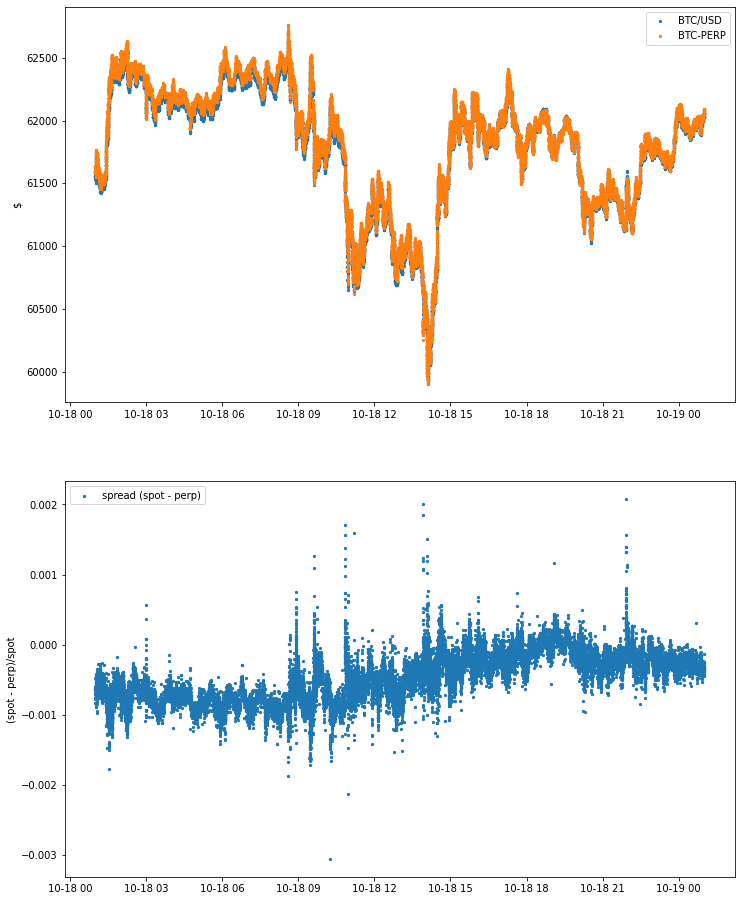

In [22]:
fig, axs = plt.subplots(2,1, figsize=(12,16))
ax1 = axs[0]
ax2 = axs[1]
ax1.scatter(df3_clean['time'], df3_clean['vwap_spot'], s=5, label = f'{symbol}/USD')
ax1.scatter(df3_clean['time'], df3_clean['vwap_perp'], s=5, label = f'{symbol}-PERP')
ax1.set_ylabel('$')
ax1.legend()

ax2.scatter(df3_clean['time'], (df3_clean['vwap_spot'] - df3_clean['vwap_perp'])/df3_clean['vwap_spot'], s=5, label='spread (spot - perp)')
ax2.set_ylabel('(spot - perp)/spot')
ax2.legend()
plt.show()

In [23]:
spread_std = np.std((df3_clean['vwap_spot'] - df3_clean['vwap_perp'])/df3_clean['vwap_spot'])
spread_mean = np.mean((df3_clean['vwap_spot'] - df3_clean['vwap_perp'])/df3_clean['vwap_spot'])
print('mean of spread (%): ', spread_mean, ", std spread: ", spread_std)

mean spread:  -0.0004528427302585867 , std spread:  0.00033531504645283077
